# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

This notebook shows only protein embeddings performance along with gene expreession, as they are super competitive

## Viz

In [2]:
version='v2.11'
norm='minmax'

In [3]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [4]:
avg_df=pd.read_csv('../../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../../results/score_tables/scores_all_seeds.csv')

In [5]:
input_data=[
 'gene_expression',

 'Complex_protein_embeddings',
 'RGCN_protein_embeddings',
 'weighted_RGCN_protein_embeddings',
 'GraphSAGE_protein_embeddings',
 'GAT_protein_embeddings',
#  'concatenated_protein_embeddings',

#  'Complex_sample_embeddings',
#  'RGCN_sample_embeddings',
#  'weighted_RGCN_sample_embeddings',
#  'GraphSAGE_sample_embeddings',
#  'GAT_sample_embeddings'
#  'concatenated_sample_embeddings'
]

In [6]:
df=avg_df
filtered_results=df[
        (df['input']=='gene_expression') 
        | ((df['version']==version) & (df['normalization']==norm))
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings'
            ])
            & (df['version']==version)
        )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [7]:
filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]

### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [8]:
metric='balanced_accuracy'

In [9]:


SECONDARY_COLORS = {
    1: "#C60B46",  # pms-1945
    2: "#ED145B",  # pms-206
    3: "#EE3524",  # pms-1795
    4: "#F37320",  # pms-1665
    5: "#7C2A90",  # pms-2602
    6: "#7D6AAF",  # pms-2725
    7: "#C6671D", # pms-153
    8: "#FEBC18", # pms-123
    9: "#004E7D",  # pms-295
    10: "#0E87C9", # pms-2935
    11: "#0094B5", # pms-314
    12: "#46C3D2", # pms-3115
    13: "#00807A",  # pms-3292
    14: "#40B769", # pms-355
    15: "#8CC63E", # pms-376
    16: "#D5DF3D" # pms-381
}
vibrant_colors = [
    SECONDARY_COLORS[2],
    SECONDARY_COLORS[4],
    SECONDARY_COLORS[6],
    SECONDARY_COLORS[8],
    SECONDARY_COLORS[11],
    SECONDARY_COLORS[14]
]
dataset_colors={
    'gene_expression': SECONDARY_COLORS[2],# -- redish
    'Complex_protein_embeddings': SECONDARY_COLORS[11],
    'GAT_protein_embeddings': SECONDARY_COLORS[4],
    'GraphSAGE_protein_embeddings': SECONDARY_COLORS[14],
    'RGCN_protein_embeddings': SECONDARY_COLORS[6],
    'weighted_RGCN_protein_embeddings': SECONDARY_COLORS[8],
}

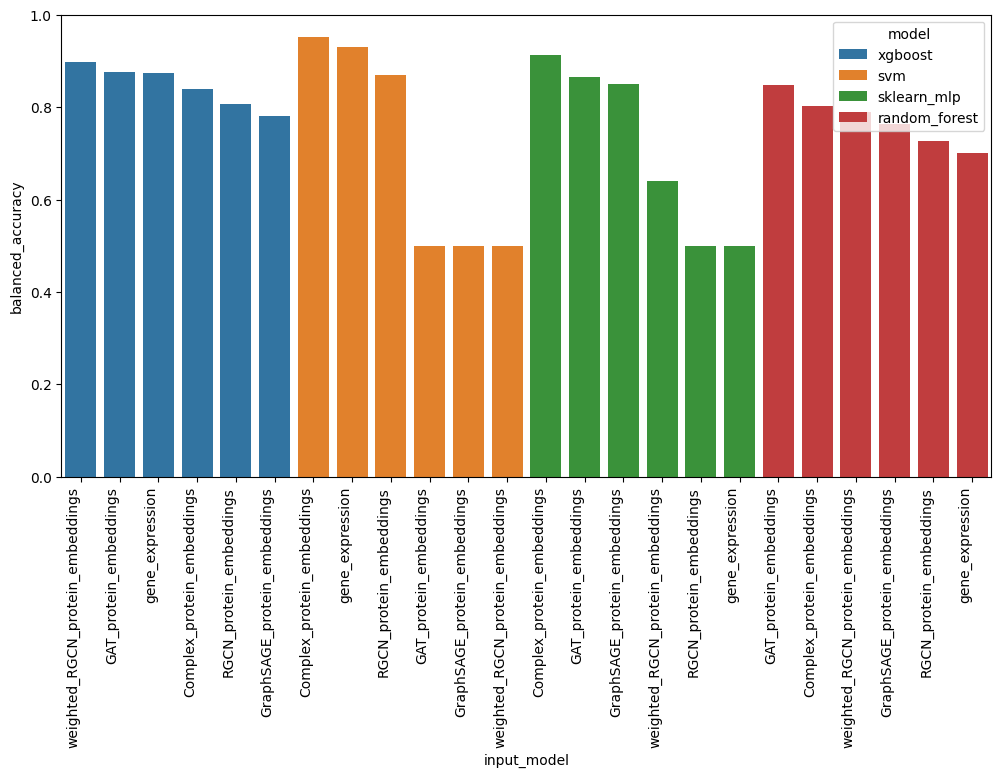

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()

/tmp/ipykernel_5660/8732749.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


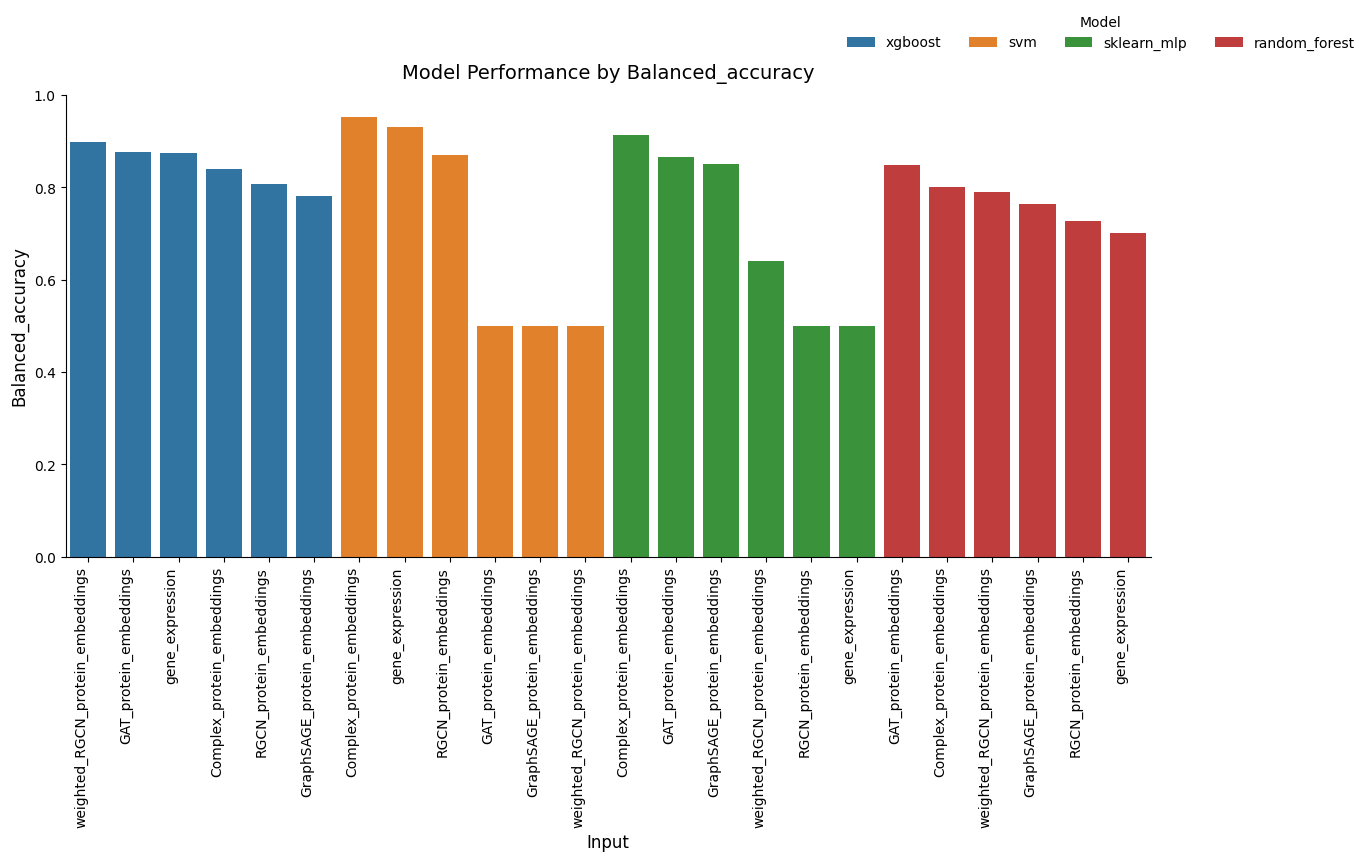

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------------------------------------------------
# Sort results by model, then by the selected metric
# ------------------------------------------------------------------
sorted_df = (
    filtered_results
    .sort_values(by=['model', metric], ascending=False)
    .assign(input_model=lambda df: df['input'] + '_' + df['model'])
)

# ------------------------------------------------------------------
# Plot
# ------------------------------------------------------------------
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=sorted_df,
    x='input_model',
    y=metric,
    hue='model',
    dodge=False,
    palette='tab10'
)

# Titles and labels
ax.set_title(f'Model Performance by {metric.capitalize()}', fontsize=14, pad=12)
ax.set_xlabel('Input', fontsize=12)
ax.set_ylabel(metric.capitalize(), fontsize=12)

# X-ticks formatting
ax.set_xticklabels(
    sorted_df['input'],
    rotation=90,
    ha='right',
    fontsize=10
)

# Legend
ax.legend(title='Model', frameon=False, loc='upper right', bbox_to_anchor=(1.2, 1.2),ncol=4)

# Clean up aesthetics
sns.despine()
# plt.tight_layout()

# Save figure
plt.savefig('../../../results/figures/metrics/protein_rank_distribution.png', dpi=300, bbox_inches='tight')

plt.show()
